Упражнение 5.1. Найти уравнение плоскости, проходящей через точки (1,1,2), (2,4,7) и (3,5,1) <br>(в функции Plane необходимо задать три точки). Сделать проверку, используя пример 1.

In [354]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
from matplotlib import cm

b = sp.Plane((1,1,2), (2,4,7), (3,5,1))
b1 = sp.Plane(sp.Point(1,1,2), sp.Point(2,4,7), sp.Point(3,5,1))

print(b.equation())
if b1 == b:
    print("Верно")

-23*x + 11*y - 2*z + 16
Верно


Упражнение 5.2. Найти уравнение плоскости, проходящей через точки (4,2,3), (2,0,1) и перпендикулярной плоскости x+2y+3z+4=0.<br> Проверить ортогональность нормальных векторов полученных плоскостей.


In [355]:
x, y, z = sp.symbols('x y z')

func = x + 2*y + 3*z + 4

y0 = 0
z0 = 1

n = (1, 2, 3)

p0 = (4, 2, 3)
p1 = (2, 0, 1)

x0 = sp.solve(func.subs([(y, y0), (z, z0)]), x)[0].evalf()

# Строим перпенд. плоскость по нормали и точке
per_plane = sp.Plane((x0, y0, z0), n)

# Строим исходную плоскость
plane = per_plane.perpendicular_plane(p0, p1)

# Создаем векторы нормалей
n0 = np.asarray(per_plane.normal_vector)
n1 = np.asarray(plane.normal_vector)

if n0.dot(n1) == 0:
  print('Векторы нормалей ортогональны, так как скалярное произведение равно нулю')

print(f'Уравнение плоскости: {plane.equation()} = 0')

Векторы нормалей ортогональны, так как скалярное произведение равно нулю
Уравнение плоскости: -2*x + 4*y - 2*z + 6 = 0


Упражнение 5.3. Найти расстояние от точки (1,2,3) до плоскости x+y+z-3=0.

In [356]:
x, y, z = sp.symbols('x y z')

func = x + y + z - 3

y0 = 0
z0 = 0

n = (1, 1, 1)

p0 = sp.Point(1, 2, 3)

x0 = sp.solve(func.subs([(y, y0), (z, z0)]), x)[0].evalf()

plane = sp.Plane((x0, y0, z0), n)

print(f'Расстояние: {plane.distance(p0)}')

Расстояние: sqrt(3)


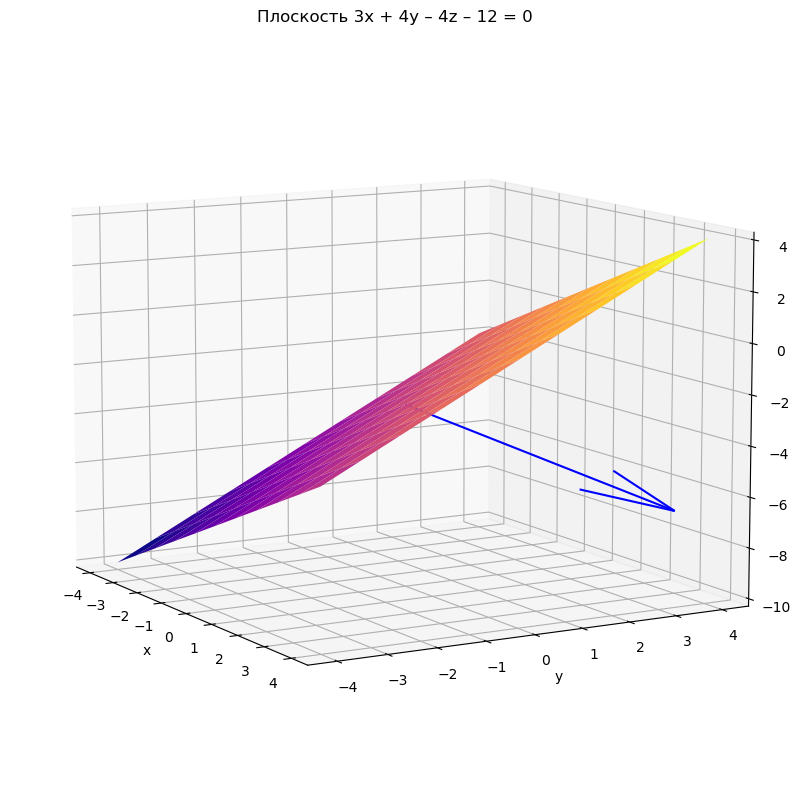

In [357]:
# Пример построения трехмерного графика
# параметры плоскости 3x+4y-4z-12=0
A = 3; B = 4; C = -4; D = -12

f = lambda x, y: (-A * x - B * y - D) / C # строим плоскость

fig = plt.figure(figsize=(10, 10)) # создаём холст

ax = fig.add_subplot(1, 1, 1, projection='3d')

xval = np.linspace(-4, 4, 100) # разбиение для x
yval = np.linspace(-4, 4, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

p = np.array([0, 0, - 3]) # точка на плоскости

v = np.array([3, 4, -4]) # вектор нормали

ax.quiver(*p, *v, color='blue') # строим вектор нормали

z = f(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=10, cstride=10, cmap=cm.plasma) # строим плоскость

plt.xlabel('x')
plt.ylabel('y')
plt.title('Плоскость 3x + 4y – 4z – 12 = 0')

ax.view_init(10, -30)
plt.show()


Упражнение 5.4. Построить плоскость, проходящую через точку М(1,-1,-3) и имеющую нормальный вектор n(2,-3,5).<br> Найти расстояние от начала координат до данной плоскости. Вывести в заголовок графика общее уравнение плоскости.<br> Изобразить нормальный вектор и данную точку.

Уравнение плоскости: 2*x - 3*y + 5*z - 20 = 0
Расстояние от начала координат: 10*sqrt(38)/19


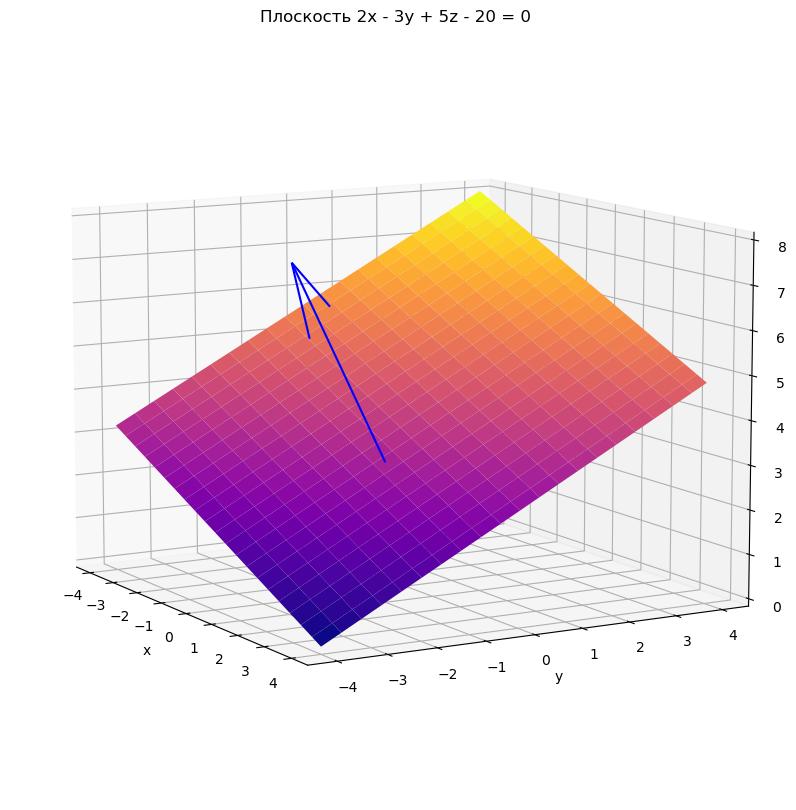

In [358]:
x, y, z = sp.symbols('x y z')

n = (2, -3, 5)
M = sp.Point(1, -1, 3)

plane = sp.Plane(M, n)

dist_0 = plane.distance(sp.Point(0, 0, 0))

plane = plane.equation(x, y, z)

print(f'Уравнение плоскости: {plane} = 0')
print(f'Расстояние от начала координат: {dist_0}')

A = plane.coeff(x, 1)
B = plane.coeff(y, 1)
C = plane.coeff(z, 1)
D = plane.subs([(x, 0), (y, 0), (z, 0)])

f = lambda x, y: (-A * x - B * y - D) / C # строим плоскость

fig = plt.figure(figsize=(10, 10)) # создаём холст

ax = fig.add_subplot(1, 1, 1, projection='3d')

xval = np.linspace(-4, 4, 100) # разбиение для x
yval = np.linspace(-4, 4, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

p = np.asarray(M) # точка на плоскости

v = np.asarray(n) # вектор нормали

ax.quiver(*p, *v, color='blue') # строим вектор нормали

z = f(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.plasma) # строим плоскость

plt.xlabel('x')
plt.ylabel('y')
plt.title('Плоскость 2x - 3y + 5z - 20 = 0')

ax.view_init(10, -30)
plt.show()

Упражнение 5.5. Построить плоскость, проходящую через точку М(2,3,-4) и параллельно векторам a(-3,2,-1) и b(0,3,1).<br> Найти расстояние от точки N(-3,1,3)  до данной плоскости. <br>Вывести в заголовок графика общее уравнение плоскости.<br> Изобразить нормальный вектор и данные точки. Указать координаты нормального вектора.

Уравнение плоскости: 5*x + 3*y - 9*z - 55 = 0
Расстояние от точки N: 94*sqrt(115)/115


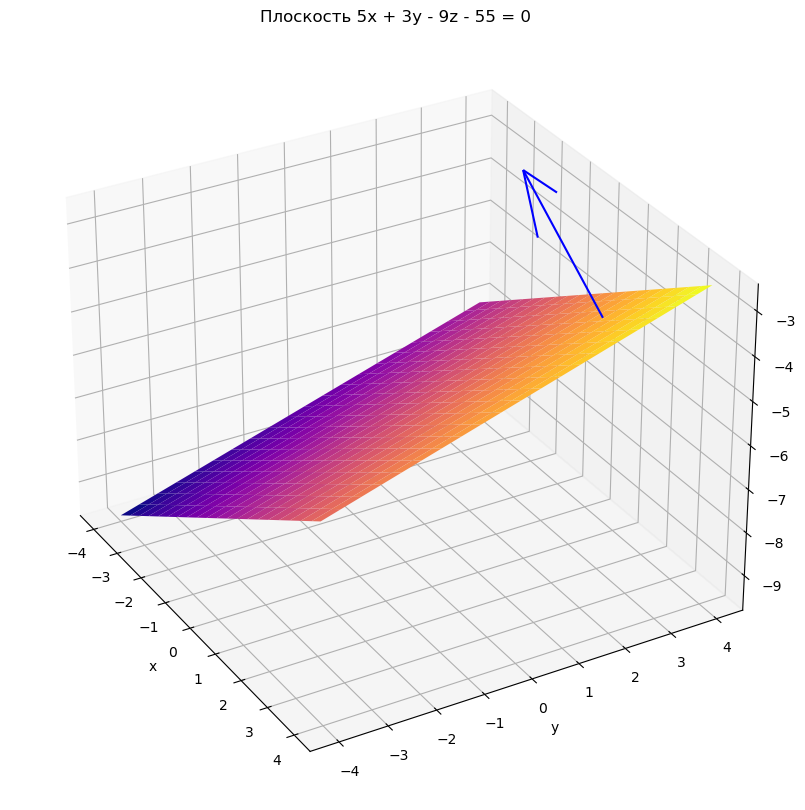

In [359]:
x, y, z = sp.symbols('x y z')

M = sp.Point(2, 3, -4)

M1 = np.array([x - M[0], y - M[1], z - M[2]])
a = np.array([-3, 2, -1])
b = np.array([0, 3, 1])

N = sp.Point(-3, 1, 3)

# уравнение плоскости, проходящей через заданную точку
# и компланарной двум неколлинеарным векторам:
matrix = sp.Matrix([M1, a, b])
plane_eq = sp.det(matrix)
print(f'Уравнение плоскости: {plane_eq} = 0')

A = plane_eq.coeff(x, 1)
B = plane_eq.coeff(y, 1)
C = plane_eq.coeff(z, 1)
D = plane_eq.subs([(x, 0), (y, 0), (z, 0)])

plane = sp.Plane(M, (A, B, C))
print(f'Расстояние от точки N: {plane.distance(N)}')

# ______________
# Отрисовка
# ______________
f = lambda x, y: (-A * x - B * y - D) / C # строим плоскость

fig = plt.figure(figsize=(10, 10)) # создаём холст

ax = fig.add_subplot(1, 1, 1, projection='3d')

xval = np.linspace(-4, 4, 100) # разбиение для x
yval = np.linspace(-4, 4, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

p = np.asarray(M) # точка на плоскости

v = np.asarray(n) # вектор нормали

ax.quiver(*p, *v, color='blue') # строим вектор нормали

z = f(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.plasma) # строим плоскость

plt.xlabel('x')
plt.ylabel('y')
plt.title('Плоскость 5x + 3y - 9z - 55 = 0')

ax.view_init(30, -30)
plt.show()

Упражнение 5.6. Найти уравнение прямой, проходящей через точку (9,8,7) перпендикулярно плоскости 2(x-1)+4(y-4)+6(z-6)=0.<br>
Найти векторное произведение нормалей полученных плоскостей.

In [360]:
x, y, z = sp.symbols('x y z')

func = 2*(x - 1) + 4*(y - 4) + 6*(z - 6)

p0 = sp.Point(9, 8, 7)

# Находим нормаль
A = func.coeff(x, 1)
B = func.coeff(y, 1)
C = func.coeff(z, 1)

n = (A, B, C)

# Находим произвольную точку
y0 = 0
z0 = 0
x0 = sp.solve(func.subs([(y, y0), (z, z0)]), x)[0].evalf()

# Находим плоскость
plane = sp.Plane((x0, y0, z0), n)

# Находим перпендекулярную прямую
line = plane.perpendicular_line(p0).equation()
print(f'Уравнение прямой: {line[0]} = 0')

Уравнение прямой: -2*x + y + 10 = 0


Упражнение 5.7. Найти параметрические уравнения прямой, проходящей через точку М(2, -1, -3) параллельна прямой {x=-1+2t, y=2-4t, z=t;<br> 
Проверить ортогональность нормального вектора плоскости и направляющего вектора прямой.<br> Найти уравнение плоскости, содержащей эти прямые. Сделать рисунок.


Вектор нормали и направляющий вектор ортогональны
Уравнение плоскости: -x + y + 6*z - 3 = 0
Уравнение прямых:
 2*x + y = 0
 2*x + y - 3 = 0


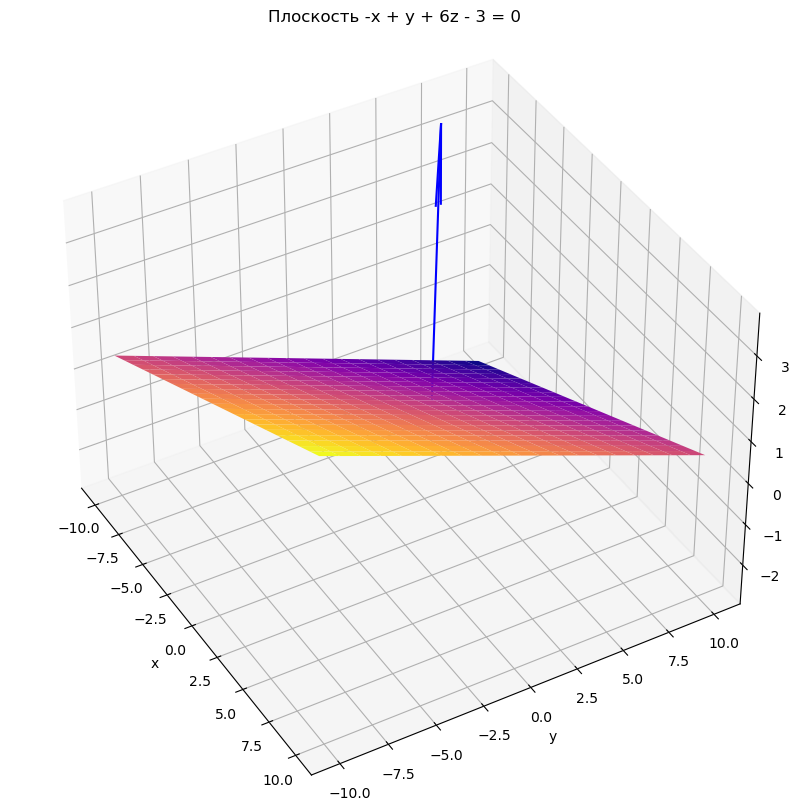

In [361]:
x, y, z, t = sp.symbols('x y z t', real=True)

M = sp.Point(2, -1, -3)

f1 = -1 + 2*t
f2 = 2 - 4*t
f3 = t

P0 = sp.Point3D(f1.subs([(t, 0)]).evalf(),
                f2.subs([(t, 0)]).evalf(),
                f3.subs([(t, 0)]).evalf())

P1 = sp.Point3D(f1.subs([(t, 1)]).evalf(),
                f2.subs([(t, 1)]).evalf(),
                f3.subs([(t, 1)]).evalf())

# Построение прямой и параллельной прямой
line = sp.Line3D(P0, P1)

paral_line = line.parallel_line(M)

# Направляющий вектор параллельной прямой
v_l = paral_line.direction

v_line = np.asarray(v_l)

# Находим точку на параллельной прямой
eq_par_line = paral_line.equation(x, y, z)

a = 0
b = sp.solve(eq_par_line.subs([(x, a)])[0].evalf() , y)[0]
c = 0

# Можно и так
# b = 0
# a = sp.solve(eq_par_line.subs([(z, b)])[1].evalf() , x)[0]
# c = 0

P2 = sp.Point3D(a, b, c)

# Построение плоскости
plane = sp.Plane(P0, P1, P2)

eq_plane = plane.equation(x, y, z)

A = float(eq_plane.coeff(x, 1).evalf())
B = float(eq_plane.coeff(y, 1).evalf())
C = float(eq_plane.coeff(z, 1).evalf())
D = float(eq_plane.subs([(x, 0), (y, 0), (z, 0)]).evalf())

# Вектор нормали плоскости
v_normali = plane.normal_vector

n_plane = np.asarray(v_normali)

if n_plane @ v_line == 0:
  print('Вектор нормали и направляющий вектор ортогональны')

print(f'Уравнение плоскости: {eq_plane} = 0')
print(f'Уравнение прямых:\n {line.equation()[0]} = 0\n {eq_par_line[0]} = 0')

# ______________
# Отрисовка
# ______________
f = lambda x, y: (-A * x - B * y - D) / C # строим плоскость

fig = plt.figure(figsize=(10, 10)) # создаём холст

ax = fig.add_subplot(1, 1, 1, projection='3d')

xval = np.linspace(-10, 10, 100) # разбиение для x
yval = np.linspace(-10, 10, 100) # разбиение для y

x, y = np.meshgrid(xval, yval)

p = np.asarray(P0) # точка на плоскости

v = np.asarray(n_plane) # вектор нормали

ax.quiver(*p, *v, color='blue') # строим вектор нормали

z = f(x, y) # вычисляем значения z в точках

surf = ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.plasma) # строим плоскость

plt.xlabel('x')
plt.ylabel('y')
plt.title('Плоскость -x + y + 6z - 3 = 0')

ax.view_init(39, -30)
plt.show()



Упражнение 5.8. Найти величину острого угла между прямыми<br>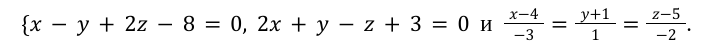

In [369]:
x, y, z, t = sp.symbols('x y z t', real=True)

f1 = x - y + 2*z - 8
f2 = 2*x + y - z + 3

# Находим произвольные точки на плоскостях
a1 = 0
b1 = a1
c1 = sp.solve(f1.subs([(x, a1), (y, b1)]))[0]

a2 = 0
b2 = a1
c2 = sp.solve(f2.subs([(x, a1), (y, b1)]))[0]

# Находим нормали плоскостей
n1 = (1, -1, 2)
n2 = (2, 1, -1)

# Строим по ним плоскости
P1 = sp.Plane(sp.Point3D(a1, b1, c1), n1)
P2 = sp.Plane(sp.Point3D(a2, b2, c2), n2)

# Получаем прямую на их пересечении
L1 = P1.intersection(P2)[0]

n1 = np.asarray(n1)
n2 = np.asarray(n2)

# Направляющий вектор прямой (канонической)
q2 = np.array([-3, 1, -2])

# Получаем прямую из канонической записи
L2 = sp.Line3D((4, -1, 5), (4+q2[0], -1+q2[1], 5+q2[2]))

print(f'Угол равен: {math.degrees(L2.angle_between(L1))}')

Угол равен: 84.81621188639929


Упражнение 5.9. Найти расстояние между параллельными прямыми с помощью функции distance. <br>Сделать проверку, используя свойство векторного произведения.<br>
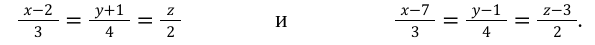


In [375]:
m1 = sp.Point(2, -1, 0)
m2 = sp.Point(7, 1, 3)

q = np.array([3, 4, 2])

l1 = sp.Line3D(m1, (m1[0] + q[0], m1[1] + q[1], m1[2] + q[2]))

print(f'Расстояние между прямыми: {l1.distance(m2)}')

Расстояние между прямыми: 3
